In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])
import json  
import cv2
import numpy as np

['NanumGothicLight']


In [2]:
def show_img(data, path, face):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig('../data/image_analysis/imagesave/'+face+'facepic.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [3]:
def show_flow(emo, order, face):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    # plt.suptitle(face)
    for idx in range(len(emotion[emo])):
        target_list = [i[0].replace('-',' - ') + " -> " + i[1].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx], palette="tab10")        
        ax[idx].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)
    plt.savefig('../data/image_analysis/imagesave/'+face+'.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

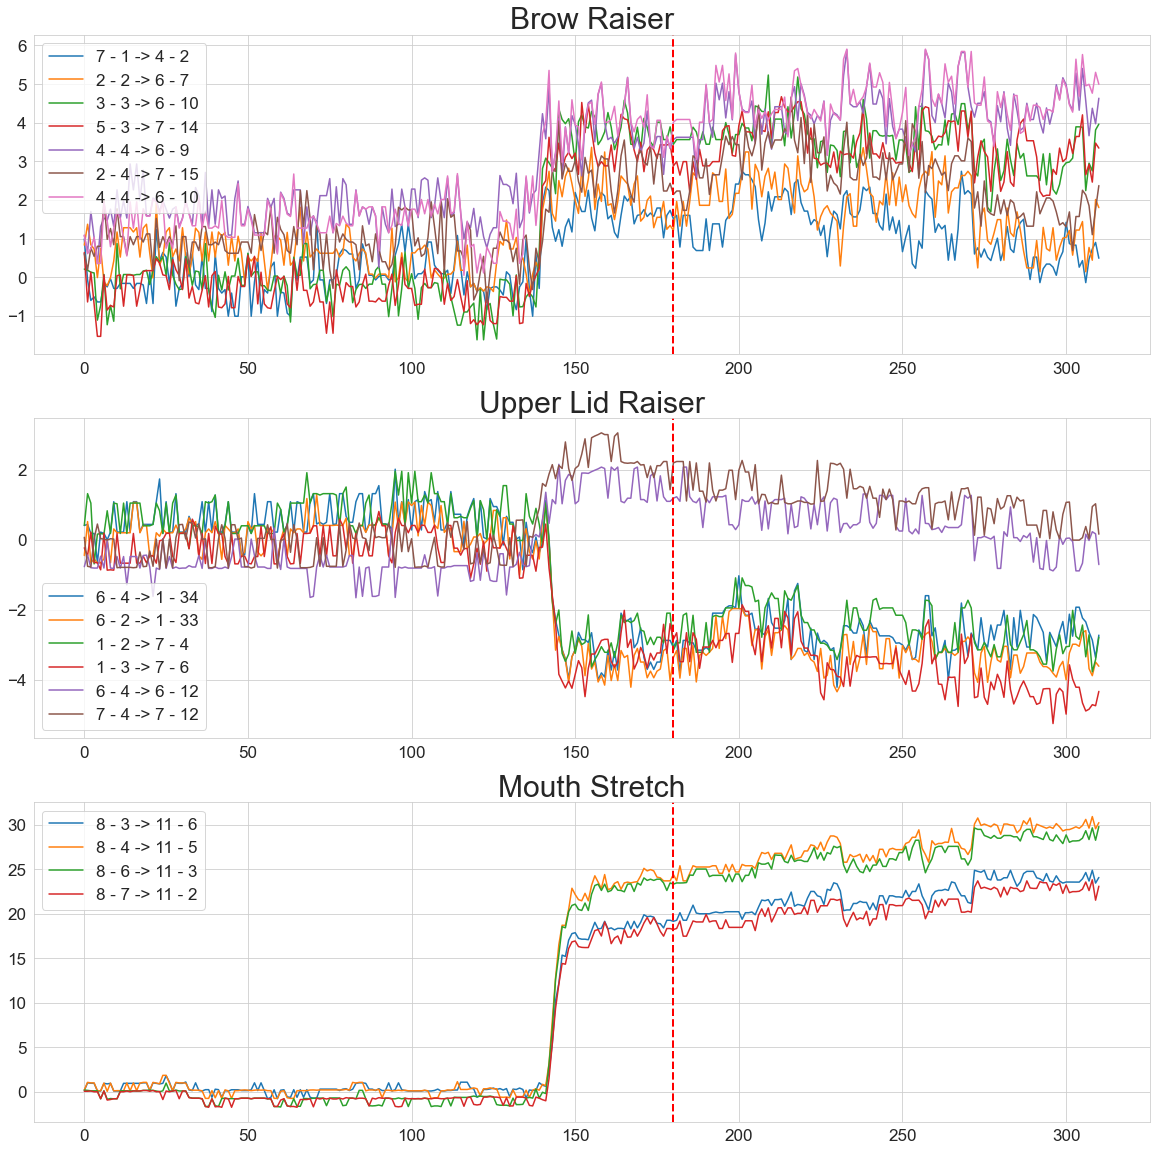

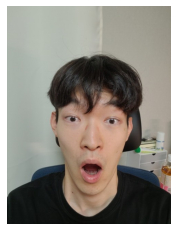

{'7 - 1 -> 4 - 2': 1.51, '2 - 2 -> 6 - 7': 1.21, '3 - 3 -> 6 - 10': 3.44, '5 - 3 -> 7 - 14': 2.88, '4 - 4 -> 6 - 9': 3.56, '2 - 4 -> 7 - 15': 2.14, '4 - 4 -> 6 - 10': 4.01, '6 - 4 -> 1 - 34': -3.08, '6 - 2 -> 1 - 33': -3.37, '1 - 2 -> 7 - 4': -3.16, '1 - 3 -> 7 - 6': -2.85, '6 - 4 -> 6 - 12': 1.19, '7 - 4 -> 7 - 12': 2.2, '8 - 3 -> 11 - 6': 19.14, '8 - 4 -> 11 - 5': 24.4, '8 - 6 -> 11 - 3': 23.32, '8 - 7 -> 11 - 2': 18.22}


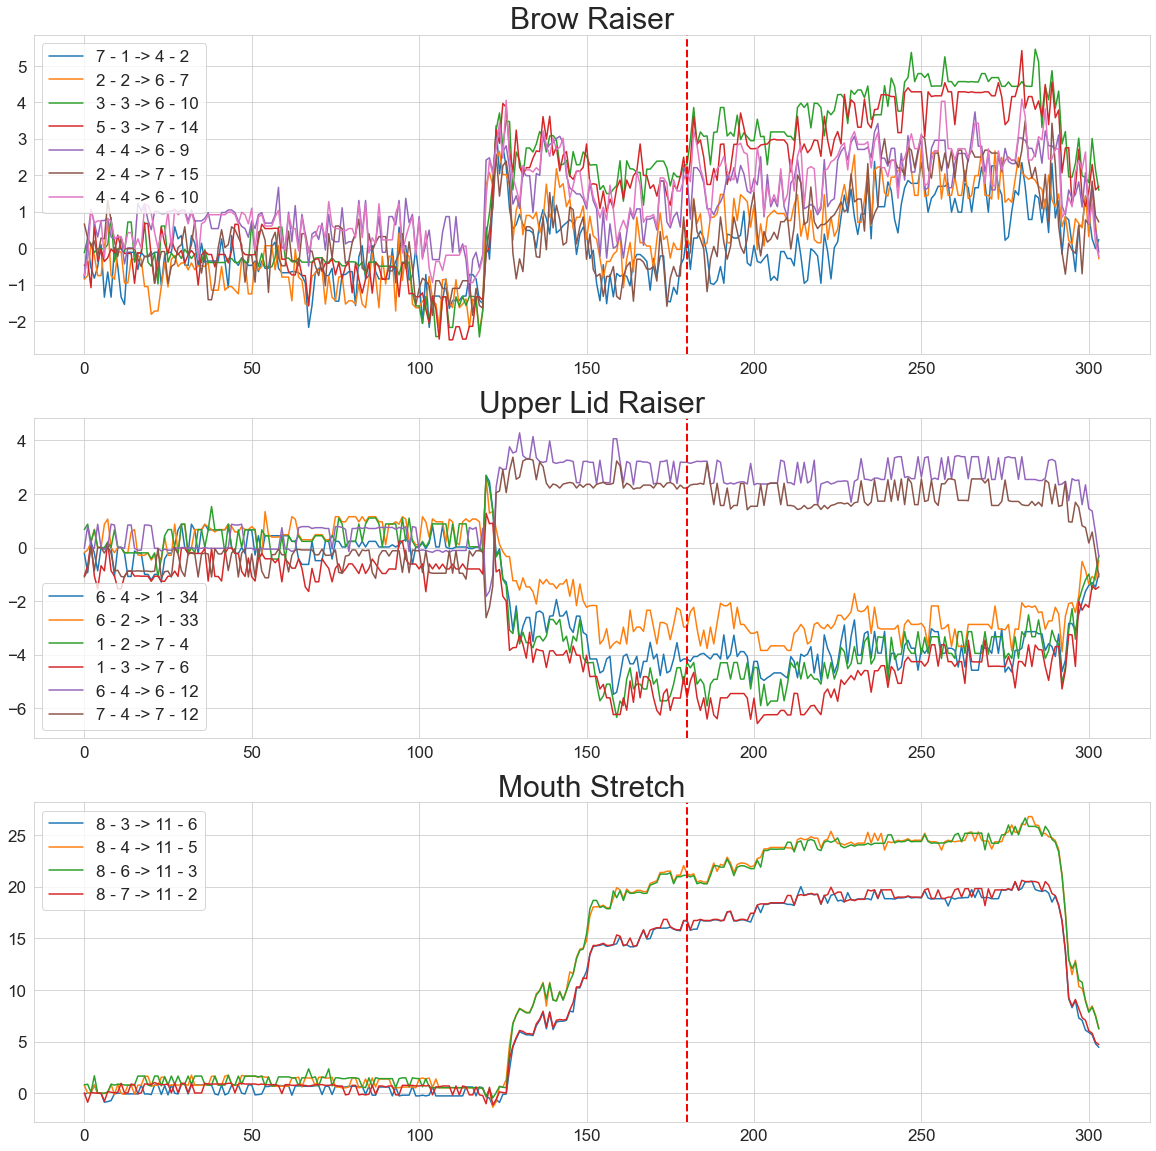

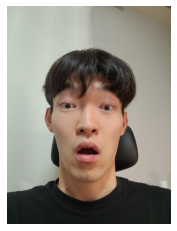

{'7 - 1 -> 4 - 2': 0.39, '2 - 2 -> 6 - 7': 0.25, '3 - 3 -> 6 - 10': 2.29, '5 - 3 -> 7 - 14': 1.75, '4 - 4 -> 6 - 9': 2.02, '2 - 4 -> 7 - 15': -0.3, '4 - 4 -> 6 - 10': 2.12, '6 - 4 -> 1 - 34': -4.16, '6 - 2 -> 1 - 33': -2.97, '1 - 2 -> 7 - 4': -4.29, '1 - 3 -> 7 - 6': -5.61, '6 - 4 -> 6 - 12': 3.18, '7 - 4 -> 7 - 12': 2.22, '8 - 3 -> 11 - 6': 16.68, '8 - 4 -> 11 - 5': 21.24, '8 - 6 -> 11 - 3': 21.09, '8 - 7 -> 11 - 2': 16.72}


In [11]:
# Happy, Sadness, Surprise, Anger
emo = {'웃기':'Happy',
        '슬픔': 'Sadness',
        '놀람': 'Surprise',
        '화남': 'Anger'}
people_list = ['나위각도', '나아래각도']
emo_kr = '놀람'
image_order = 180

for fa in people_list:
    face = fa + emo_kr
    df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
    with open('../data/image_analysis/emotion_rule.json', 'r') as f:
        emotion = json.load(f)
    show_flow(emo[emo_kr], image_order, face)
    show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    print(pd.DataFrame(df.iloc[image_order]).to_dict()[image_order])